# Lung Disease

In [1]:
import pandas as pd
import numpy as np

df_lung = pd.read_csv('../input/LungDisease.csv')
df_lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


Text(0,0.5,'PEFR')

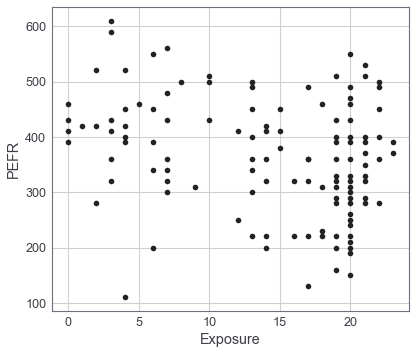

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

pefr = df_lung['PEFR'].values
expo = df_lung['Exposure'].values

plt.plot(expo, pefr, 'ko')
plt.xlabel('Exposure')
plt.ylabel('PEFR')

In [55]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(expo.reshape(-1,1), pefr)
print(lin_reg.coef_, lin_reg.intercept_)

[-4.18457649] 424.582806573957


Text(0,0.5,'PEFR')

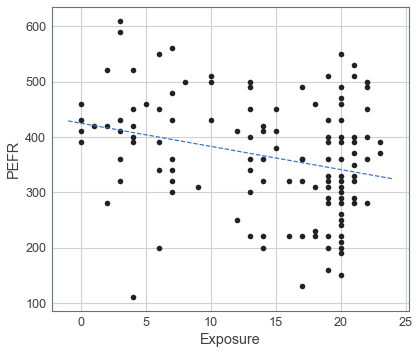

In [56]:
plt.plot(expo, pefr, 'ko')
plt.plot(range(-1,25), lin_reg.predict(np.array(range(-1,25)).reshape(-1,1)), 'b--')
plt.xlabel('Exposure')
plt.ylabel('PEFR')

In [5]:
lin_reg.score(expo.reshape(-1,1), pefr)

0.0767410228628338

# King County Housing Data

In [6]:
df_house = pd.read_csv('../input/house_sales.csv', sep='\t')
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [7]:
X = df_house[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']].values
X

array([[2.4000e+03, 9.3730e+03, 3.0000e+00, 6.0000e+00, 7.0000e+00],
       [3.7640e+03, 2.0156e+04, 3.7500e+00, 4.0000e+00, 1.0000e+01],
       [2.0600e+03, 2.6036e+04, 1.7500e+00, 4.0000e+00, 8.0000e+00],
       ...,
       [1.0700e+03, 1.1170e+04, 1.0000e+00, 4.0000e+00, 6.0000e+00],
       [1.3450e+03, 6.2230e+03, 2.0000e+00, 3.0000e+00, 7.0000e+00],
       [7.9000e+02, 4.4000e+03, 1.5000e+00, 3.0000e+00, 7.0000e+00]])

In [8]:
y = df_house['AdjSalePrice'].values
y

array([ 300805., 1076162.,  761805., ...,  220744.,  342207.,  475489.])

In [9]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.score(X, y)

0.5406641508395744

In [11]:
print(lin_reg.coef_, lin_reg.intercept_)

[ 2.28832107e+02 -6.05060092e-02 -1.94380990e+04 -4.77811534e+04
  1.06117210e+05] -521924.72203797416


In [12]:
lin_reg.score(X, y)

0.5406641508395744

In [13]:
import statsmodels.api as sm

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5340.
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        09:16:26   Log-Likelihood:            -3.1520e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22683   BIC:                         6.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.219e+05   1.57e+04    -33.349      0.000   -5.53e+05   -4.91e+05
x1           228.8321      3.898     58.699      0.000     221.191     236.473
x2            -0.0605      0.061     -0.989      0.323      -0.180       0.059
x3         -1.944e+04   3625.219     -5.362      0.000   -2.65e+04   -1.23e+04
x4         -4.778e+04   2489.443    -19.194      0.000   -5.27e+04   -4.29e+04
x5          1.061e+05   2396.136     44.287      0.000    1.01e+05    1.11e+05
==============================================================================
Omnibus:                    29679.186   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19394127.212
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.565   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, cv = 5)
scores, np.mean(scores)

(array([0.58911134, 0.54811216, 0.52751099, 0.48017957, 0.55373405]),
 0.5397296205301588)

In [15]:
lasso_reg = linear_model.Lasso(alpha = 0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lasso_reg.score(X, y)

0.5406641508390675

In [17]:
lasso_aic = linear_model.LassoLarsIC(criterion='aic')
lasso_aic.fit(X, y)

LassoLarsIC(copy_X=True, criterion='aic', eps=2.220446049250313e-16,
      fit_intercept=True, max_iter=500, normalize=True, positive=False,
      precompute='auto', verbose=False)

In [18]:
lasso_aic.alphas_, lasso_aic.criterion_

(array([1778.75352986, 1560.7061347 ,  120.29392337,   24.40480277,
           7.65722775,    0.        ]),
 array([22689.        , 20167.46353789, 10690.23857735, 10451.63030783,
        10432.61518427, 10431.8710816 ]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0,0.5,'AIC')

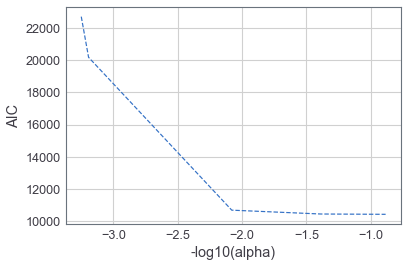

In [19]:
plt.plot(-np.log10(lasso_aic.alphas_), lasso_aic.criterion_, 'b--')
plt.xlabel('-log10(alpha)')
plt.ylabel('AIC')

In [20]:
date = df_house['DocumentDate'].values
for i in range(len(date)):
    date[i] = int(date[i][:4])
date.astype(float)

array([2014., 2006., 2007., ..., 2012., 2006., 2007.])

In [21]:
lin_reg = linear_model.SGDRegressor()
lin_reg.fit(X, y, sample_weight = date)
import sklearn
print(sklearn.__version__)

0.19.2


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [22]:
print(lin_reg.coef_, lin_reg.intercept_)

[-4.02872842e+15 -5.60395544e+14  8.10684878e+13  5.99363133e+14
  6.17056567e+14] [1.88727903e+14]


In [23]:
scores = []
for iB in range(1000):
    indices = np.random.choice(len(y), len(y), replace=True)
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X[indices], y[indices])
    scores.append(lin_reg.score(X[indices], y[indices]))

Text(0,0.5,'RMS')

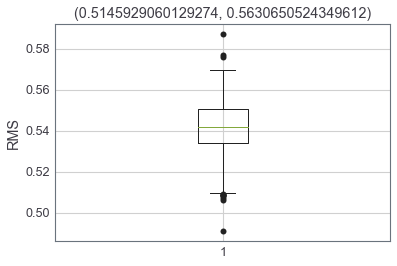

In [24]:
plt.boxplot(scores, sym='k')
plt.title("({}, {})".format(np.percentile(scores, 2.5), np.percentile(scores, 97.5)))
plt.ylabel('RMS')

In [25]:
X_predict, y_predict = [X[0]], y[0]
y_predicts = []
for iB in range(1000):
    indices = np.random.choice(len(y), len(y), replace=True)
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X[indices], y[indices])
    residual_index = np.random.choice(len(y))
    residual = y[residual_index] - lin_reg.predict([X[residual_index]])[0]
    y_predicts.append(lin_reg.predict(X_predict)[0] + residual)

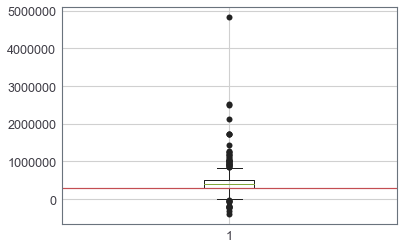

In [26]:
plt.boxplot(y_predicts, sym='k')
plt.axhline(y[0], color='r')
#plt.ylim([0,750000])

In [27]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22689 entries, 1 to 27063
Data columns (total 22 columns):
DocumentDate       22689 non-null object
SalePrice          22689 non-null int64
PropertyID         22689 non-null int64
PropertyType       22689 non-null object
ym                 22689 non-null object
zhvi_px            22689 non-null int64
zhvi_idx           22689 non-null float64
AdjSalePrice       22689 non-null float64
NbrLivingUnits     22689 non-null int64
SqFtLot            22689 non-null int64
SqFtTotLiving      22689 non-null int64
SqFtFinBasement    22689 non-null int64
Bathrooms          22689 non-null float64
Bedrooms           22689 non-null int64
BldgGrade          22689 non-null int64
YrBuilt            22689 non-null int64
YrRenovated        22689 non-null int64
TrafficNoise       22689 non-null int64
LandVal            22689 non-null int64
ImpsVal            22689 non-null int64
ZipCode            22689 non-null int64
NewConstruction    22689 non-null bool
dty

In [28]:
df_house['PropertyType'].value_counts()

Single Family    20722
Townhouse         1710
Multiplex          257
Name: PropertyType, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

le = LabelEncoder()
df_house['PropertyType'] = le.fit_transform(df_house['PropertyType'])
emb_cat = pd.DataFrame(keras.utils.to_categorical(df_house['PropertyType']),
                      columns=['Multiplex', 'Single', 'Townhouse'])
emb_cat.head(10)

,Multiplex,Single,Townhouse
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [30]:
df_house.reset_index(inplace=True)
df_house = pd.concat([df_house, emb_cat], axis=1)
df_house.head()

,index,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Multiplex,Single,Townhouse
0,1,2014,280000,1000102,0,2014-09-01,405100,0.930836,300805.0,2,...,1991,0,0,70000,229000,98002,False,1.0,0.0,0.0
1,2,2006,1000000,1200013,1,2006-06-01,404400,0.929228,1076162.0,1,...,2005,0,0,203000,590000,98166,True,0.0,1.0,0.0
2,3,2007,745000,1200019,1,2007-01-01,425600,0.977941,761805.0,1,...,1947,0,0,183000,275000,98166,False,0.0,1.0,0.0
3,4,2008,425000,2800016,1,2008-02-01,418400,0.961397,442065.0,1,...,1966,0,0,104000,229000,98168,False,0.0,1.0,0.0
4,5,2013,240000,2800024,1,2013-03-01,351600,0.807904,297065.0,1,...,1948,0,0,104000,205000,98168,False,0.0,1.0,0.0


In [31]:
X = df_house[['SqFtTotLiving', 'SqFtLot', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 
             'Townhouse', 'Single']]
y = df_house[['AdjSalePrice']]

In [32]:
lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3827.
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        09:16:36   Log-Likelihood:            -3.1517e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.469e+05   2.24e+04    -19.986      0.000   -4.91e+05   -4.03e+05
SqFtTotLiving   223.3739      4.130     54.091      0.000     215.280     231.468
SqFtLot          -0.0352      0.031     -1.150      0.250      -0.095       0.025
SqFtLot          -0.0352      0.031     -1.150      0.250      -0.095       0.025
Bathrooms     -1.597e+04   3809.680     -4.193      0.000   -2.34e+04   -8505.902
Bedrooms       -5.09e+04   2537.687    -20.058      0.000   -5.59e+04   -4.59e+04
BldgGrade      1.094e+05   2457.175     44.533      0.000    1.05e+05    1.14e+05
Townhouse     -1.151e+05   1.82e+04     -6.340      0.000   -1.51e+05   -7.96e+04
Single        -8.469e+04   1.66e+04     -5.088      0.000   -1.17e+05   -5.21e+04
==============================================================================
Omnibus:                    29767.751   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19694167.912
Skew:                           6.926   Prob(JB):                         0.00
Kurtosis:                     146.667   Cond. No.                     4.51e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(97500, 98500)

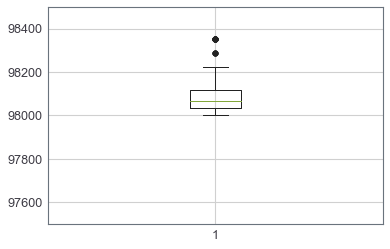

In [33]:
zips = df_house['ZipCode'].values
plt.boxplot(zips, sym='k')
plt.ylim([97500, 98500])

In [34]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X).ravel()
residuals = y.values.ravel() - y_pred

(-2000000.0, 2000000.0)

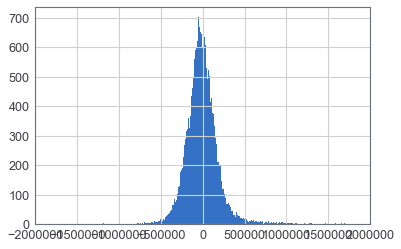

In [35]:
plt.hist(residuals, bins=1000)
plt.xlim([-0.2e7,0.2e7])

(97500, 98500)

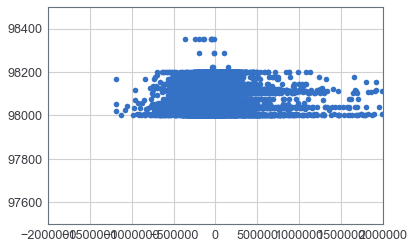

In [36]:
plt.plot(residuals, zips, 'bo')
plt.xlim([-0.2e7,0.2e7])
plt.ylim([97500, 98500])

In [37]:
df_zip = pd.DataFrame(data={'ZipCode': zips, 'residual': residuals})
df_zip.head()

,ZipCode,residual
0,98002,-200453.850156
1,98166,-62385.667915
2,98166,191361.478936
3,98168,-192240.089351
4,98168,-89398.447638


In [38]:
df_zip.groupby('ZipCode').mean().head(10)

,residual
ZipCode,
9800,82772.332085
89118,-59043.015926
98001,-142701.567655
98002,-65789.158348
98003,-138315.923749
98004,479109.869239
98005,90910.350078
98006,10940.947264
98007,7997.381107


In [39]:
mean_residual = df_zip.groupby('ZipCode').mean().values
zip_cuts = []
for i in range(6):
    zip_cuts.append(np.percentile(mean_residual, 20*i))
zip_cuts[0] -= 10
zip_cuts[-1] += 10
zip_cuts

[-521168.757486202,
 -100783.44216275869,
 -60053.72838119378,
 -9526.827573838393,
 94819.69910295578,
 1060296.1401270314]

In [40]:
df_zip_mean = df_zip.groupby('ZipCode').mean()
df_zip_mean.head()

,residual
ZipCode,
9800,82772.332085
89118,-59043.015926
98001,-142701.567655
98002,-65789.158348
98003,-138315.923749


In [41]:
df_zip_mean['zip_cat'] = (pd.cut(df_zip_mean['residual'], zip_cuts, 
                    labels=range(len(zip_cuts)-1))).astype(int)
df_zip_mean.head()

,residual,zip_cat
ZipCode,,
9800,82772.332085,3
89118,-59043.015926,2
98001,-142701.567655,0
98002,-65789.158348,1
98003,-138315.923749,0


In [42]:
df_house = df_house.join(df_zip_mean, on='ZipCode')
df_house.head()

,index,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Multiplex,Single,Townhouse,residual,zip_cat
0,1,2014,280000,1000102,0,2014-09-01,405100,0.930836,300805.0,2,...,0,70000,229000,98002,False,1.0,0.0,0.0,-65789.158348,1
1,2,2006,1000000,1200013,1,2006-06-01,404400,0.929228,1076162.0,1,...,0,203000,590000,98166,True,0.0,1.0,0.0,-32786.736704,2
2,3,2007,745000,1200019,1,2007-01-01,425600,0.977941,761805.0,1,...,0,183000,275000,98166,False,0.0,1.0,0.0,-32786.736704,2
3,4,2008,425000,2800016,1,2008-02-01,418400,0.961397,442065.0,1,...,0,104000,229000,98168,False,0.0,1.0,0.0,-59434.978576,2
4,5,2013,240000,2800024,1,2013-03-01,351600,0.807904,297065.0,1,...,0,104000,205000,98168,False,0.0,1.0,0.0,-59434.978576,2


<Container object of 5 artists>

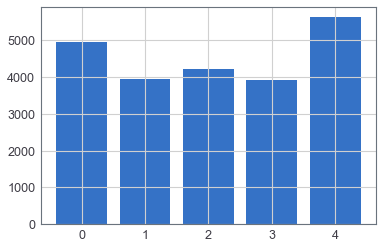

In [43]:
plt.bar(range(5), df_house.groupby('zip_cat')['zip_cat'].value_counts())

In [44]:
X = df_house[['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house['AdjSalePrice'].values

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     5515.
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        09:16:39   Log-Likelihood:            -3.1500e+05
No. Observations:               22689   AIC:                         6.300e+05
Df Residuals:                   22683   BIC:                         6.301e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.876e+05   1.58e+04    -37.092      0.000   -6.19e+05   -5.57e+05
x1         -4.979e+04   2466.447    -20.186      0.000   -5.46e+04    -4.5e+04
x2          1.202e+05   2475.403     48.541      0.000    1.15e+05    1.25e+05
x3           196.7962      4.125     47.709      0.000     188.711     204.881
x4            90.3950      4.498     20.095      0.000      81.578      99.212
x5         -1.761e+04   3588.906     -4.906      0.000   -2.46e+04   -1.06e+04
==============================================================================
Omnibus:                    29815.495   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20230173.785
Skew:                           6.939   Prob(JB):                         0.00
Kurtosis:                     148.625   Cond. No.                     2.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = df_house[['Bedrooms', 'BldgGrade']].values
y = df_house['AdjSalePrice'].values

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     9706.
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        09:16:39   Log-Likelihood:            -3.1701e+05
No. Observations:               22689   AIC:                         6.340e+05
Df Residuals:                   22686   BIC:                         6.340e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.167e+06   1.27e+04    -92.190      0.000   -1.19e+06   -1.14e+06
x1          3.125e+04   2233.737     13.989      0.000    2.69e+04    3.56e+04
x2          2.118e+05   1711.234    123.749      0.000    2.08e+05    2.15e+05
==============================================================================
Omnibus:                    29852.543   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17420290.766
Skew:                           7.019   Prob(JB):                         0.00
Kurtosis:                     138.018   Cond. No.                         57.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
df_house.corr()

,index,SalePrice,PropertyID,PropertyType,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Multiplex,Single,Townhouse,residual,zip_cat
index,1.000000,-0.025685,0.993058,0.024677,-0.015982,-0.015982,-0.024027,-0.015766,-0.119345,-0.020565,...,-0.032428,-0.031046,-0.011213,0.000631,0.047813,-0.013598,-0.014975,0.021414,-0.021202,-0.007698
SalePrice,-0.025685,1.000000,-0.026192,-0.081643,0.096770,0.096770,0.985467,0.023776,0.134764,0.689925,...,-0.011723,0.804943,0.825471,-0.017014,0.048791,-0.002597,0.085338,-0.089923,0.458202,0.296962
PropertyID,0.993058,-0.026192,1.000000,0.025270,-0.015182,-0.015182,-0.024616,-0.014102,-0.114653,-0.020237,...,-0.032571,-0.032630,-0.011651,0.001687,0.046724,-0.011470,-0.017181,0.022912,-0.023095,-0.010079
PropertyType,0.024677,-0.081643,0.025270,1.000000,-0.012587,-0.012587,-0.080395,-0.324829,-0.082388,-0.183981,...,0.005257,-0.136639,-0.012024,0.009798,0.280393,-0.396295,-0.723257,0.929805,0.090111,0.121499
zhvi_px,-0.015982,0.096770,-0.015182,-0.012587,1.000000,1.000000,-0.044627,0.015245,-0.012901,-0.021590,...,0.008455,-0.023783,-0.031458,0.004230,0.038360,0.019776,-0.002020,-0.005775,-0.016069,-0.012268
zhvi_idx,-0.015982,0.096770,-0.015182,-0.012587,1.000000,1.000000,-0.044627,0.015245,-0.012901,-0.021590,...,0.008455,-0.023783,-0.031458,0.004230,0.038360,0.019776,-0.002020,-0.005775,-0.016069,-0.012268
AdjSalePrice,-0.024027,0.985467,-0.024616,-0.080395,-0.044627,-0.044627,1.000000,0.022540,0.137143,0.695183,...,-0.012271,0.812167,0.833389,-0.017856,0.041172,-0.004768,0.085696,-0.089435,0.463370,0.300942
NbrLivingUnits,-0.015766,0.023776,-0.014102,-0.324829,0.015245,0.015245,0.022540,1.000000,-0.005113,0.059563,...,0.083209,0.031421,0.003004,0.005786,-0.036871,0.806064,-0.274532,-0.030500,0.049243,0.064207
SqFtLot,-0.119345,0.134764,-0.114653,-0.082388,-0.012901,-0.012901,0.137143,-0.005113,1.000000,0.195950,...,-0.012827,0.071051,0.107663,-0.010942,-0.067399,-0.020170,0.099317,-0.097779,-0.094784,-0.131971
SqFtTotLiving,-0.020565,0.689925,-0.020237,-0.183981,-0.021590,-0.021590,0.695183,0.059563,0.195950,1.000000,...,-0.060718,0.467805,0.761816,-0.031595,0.113968,0.014569,0.176949,-0.194454,0.105572,-0.030077


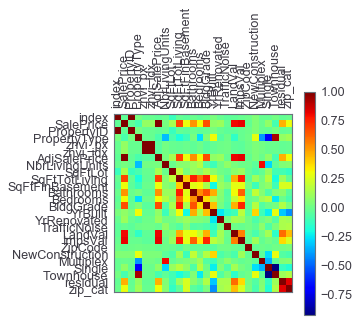

In [47]:
columns = df_house.corr().columns

plt.matshow(df_house.corr().values, cmap='jet')
plt.grid(False)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.yticks(range(len(columns)), columns)
plt.colorbar()

In [48]:
X = df_house[['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house['AdjSalePrice'].values

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
residuals = y - lin_reg.predict(X)
std_res = np.std(residuals)
residuals /= std_res
print('min', np.argmin(residuals), residuals[np.argmin(residuals)])
print('max', np.argmax(residuals), residuals[np.argmax(residuals)])

min 8006 -4.926838362420435
max 16975 36.60676247173345


In [49]:
df_house.iloc[[16975]]

,index,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Multiplex,Single,Townhouse,residual,zip_cat
16975,20115,2006,11000000,7397300120,1,2006-08-01,411100,0.944623,11644855.0,2,...,0,3612000,4846000,98039,False,0.0,1.0,0.0,1.060286e+06,4


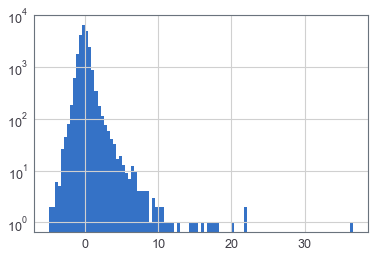

In [50]:
plt.hist(residuals, bins=100)
plt.yscale('log', nonposy='clip')

In [58]:
X = df_house[df_house['ZipCode']==98105][['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house[df_house['ZipCode']==98105]['AdjSalePrice'].values

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()
#stats.outliers_influence.OLSInfluence.summary_frame(lin_reg_sm) ???

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 21 Aug 2018   Prob (F-statistic):           1.17e-98
Time:                        09:21:21   Log-Likelihood:                -4237.4
No. Observations:                 313   AIC:                             8487.
Df Residuals:                     307   BIC:                             8509.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.141e+05   1.05e+05     -5.846      0.000   -8.21e+05   -4.07e+05
x1          -3.42e+04   1.34e+04     -2.559      0.011   -6.05e+04   -7904.546
x2          1.129e+05   1.65e+04      6.848      0.000    8.05e+04    1.45e+05
x3           377.2316     28.140     13.405      0.000     321.860     432.604
x4          -182.3881     34.432     -5.297      0.000    -250.140    -114.636
x5           -3.1e+04   2.04e+04     -1.518      0.130   -7.12e+04    9194.718
==============================================================================
Omnibus:                       95.260   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.484
Skew:                           1.001   Prob(JB):                    2.20e-167
Kurtosis:                      10.406   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residuals')

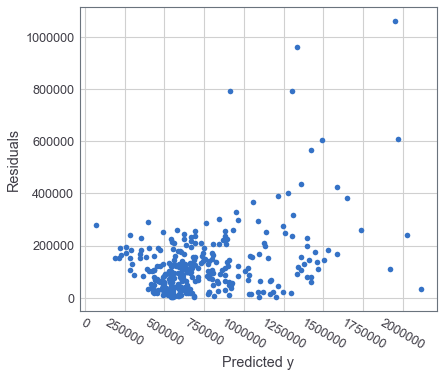

In [57]:
X = df_house[df_house['ZipCode']==98105][['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house[df_house['ZipCode']==98105]['AdjSalePrice'].values

lin_reg.fit(X, y)
residuals = y - lin_reg.predict(X)
plt.plot(lin_reg.predict(X), np.abs(residuals), 'bo')
plt.xticks(rotation=-30)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')

Text(0,0.5,'PartialResid')

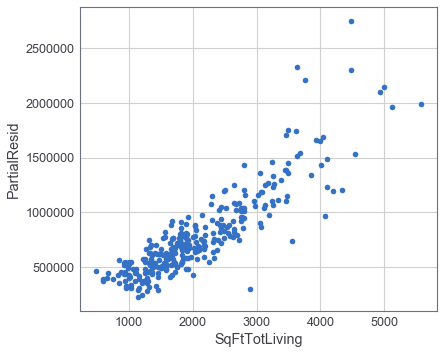

In [65]:
partialRes = y - lin_reg.predict(X) + 377.2316 * X[:,2].ravel()
plt.plot(X[:,2].ravel(), partialRes, 'bo')
plt.xlabel('SqFtTotLiving')
plt.ylabel('PartialResid')

In [77]:
X = df_house[df_house['ZipCode']==98105][['Bedrooms', 'BldgGrade', 
                                          'SqFtLot', 'Bathrooms', 'SqFtTotLiving']].values
y = df_house[df_house['ZipCode']==98105]['AdjSalePrice'].values

X = np.hstack((X, X[:,4].reshape(-1,1) ** 2))

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          9.95e-106
Time:                        09:42:00   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
x1         -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
x2          1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
x3            32.5594      5.436      5.990      0.000      21.863      43.256
x4         -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
x5             7.4521     55.418      0.134      0.893    -101.597     116.501
x6             0.0388      0.010      4.040      0.000       0.020       0.058
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""